<a href="https://colab.research.google.com/github/sujataprasad01/ML-Market-Basket-Analysis/blob/main/Apriori_Algorithm_(Market_Basket_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Installing the apyori to perform the Apriori

In [3]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=08bf4acc65c3696bfa6e9f32ce709c2fe95b2bc7ad76775b522d5a1b041663d4
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [4]:
from apyori import apriori

# Importing Dataset

In [7]:
df=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv")

In [8]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


# Data analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
df.shape

(38765, 3)

In [ ]:
df.size

116295

In [ ]:
df.ndim

2

In [ ]:
df.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [ ]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
df.head(1)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit


In [ ]:
df.itemDescription.value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

In [ ]:
df.itemDescription.value_counts().nlargest(10)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

In [ ]:
df.itemDescription.value_counts().nsmallest(10)
#df.itemDescription.value_counts().tail(10).sort_values()

kitchen utensil          1
preservation products    1
baby cosmetics           3
bags                     4
make up remover          5
toilet cleaner           5
frozen chicken           5
rubbing alcohol          5
salad dressing           6
whisky                   8
Name: itemDescription, dtype: int64

<Axes: >

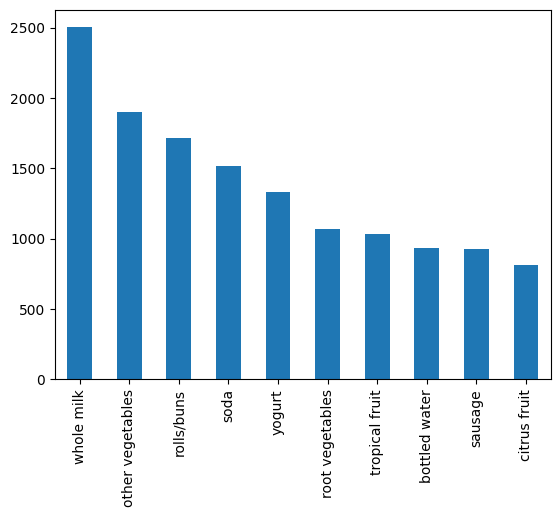

In [ ]:
df['itemDescription'].value_counts().nlargest(10).plot.bar()

<Axes: >

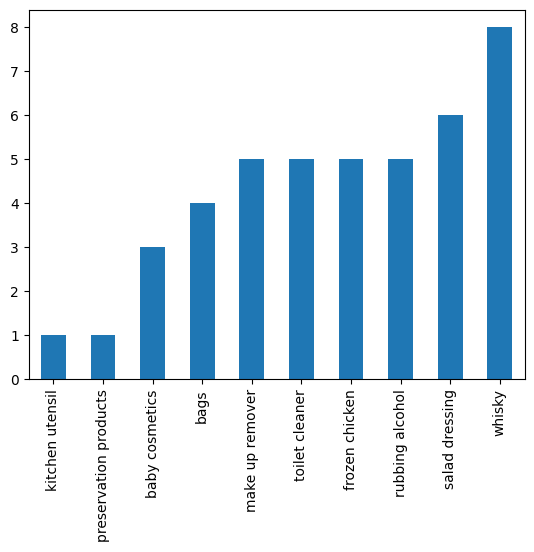

In [ ]:
df['itemDescription'].value_counts().nsmallest(10).plot.bar()

In [ ]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


<Axes: >

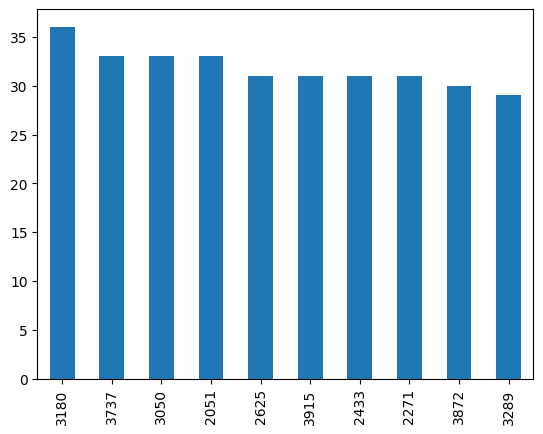

In [ ]:
df['Member_number'].value_counts().nlargest(10).plot.bar()

In [9]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [11]:
df.Date.value_counts().nlargest(10)

21-01-2015    96
21-07-2015    93
29-11-2015    92
08-08-2015    92
30-04-2015    91
28-08-2014    88
26-03-2015    88
30-09-2015    87
19-06-2015    85
16-05-2015    85
Name: Date, dtype: int64

In [19]:
df.Date[0][6:]

'2015'

In [23]:
x=[]
for i in range(len(df.Date)):
  li=df.Date[i][6:]
  x.append(li)


In [28]:
df['Month']=pd.DatetimeIndex(df['Date']).month

<ipython-input-28-436711716360>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Month']=pd.DatetimeIndex(df['Date']).month


In [29]:
df['Day']=pd.DatetimeIndex(df['Date']).day

<ipython-input-29-b98134eafa77>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Day']=pd.DatetimeIndex(df['Date']).day


In [24]:
df['Year']=x

In [25]:
df.head()

,Member_number,Date,itemDescription,Year
0,1808,21-07-2015,tropical fruit,2015
1,2552,05-01-2015,whole milk,2015
2,2300,19-09-2015,pip fruit,2015
3,1187,12-12-2015,other vegetables,2015
4,3037,01-02-2015,whole milk,2015


In [26]:
df.Year.value_counts()

2015    20488
2014    18277
Name: Year, dtype: int64

In [31]:
df.Month.value_counts()

8     3498
5     3335
1     3333
6     3316
3     3283
11    3273
7     3268
10    3218
4     3172
12    3074
2     3032
9     2963
Name: Month, dtype: int64

In [32]:
df.Day.value_counts()

28    1375
21    1354
26    1351
8     1349
14    1341
13    1341
27    1327
4     1308
10    1308
11    1297
5     1290
24    1290
18    1285
7     1277
23    1277
22    1272
19    1272
9     1271
2     1252
1     1250
15    1245
3     1243
6     1232
25    1229
20    1214
30    1201
17    1181
12    1179
16    1158
29    1124
31     672
Name: Day, dtype: int64

In [36]:
df[df.Year=='2015']

,Member_number,Date,itemDescription,Year,Month,Day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1
2,2300,19-09-2015,pip fruit,2015,9,19
3,1187,12-12-2015,other vegetables,2015,12,12
4,3037,01-02-2015,whole milk,2015,1,2
...,...,...,...,...,...,...
37114,1185,24-08-2015,chocolate,2015,8,24
37115,4656,25-12-2015,newspapers,2015,12,25
37116,2741,11-09-2015,canned vegetables,2015,11,9
37117,2654,17-08-2015,coffee,2015,8,17


In [47]:
df.Month[df.Year=='2015'].value_counts().nlargest(1)

8    1963
Name: Month, dtype: int64

In [57]:
df.Day[(df.Year=='2015') & (df.Month=='8')].value_counts()

Series([], Name: Day, dtype: int64)

# Aprori Implementation

In [58]:
df.head(2)

,Member_number,Date,itemDescription,Year,Month,Day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1


In [59]:
data=df.copy()

In [62]:
data=pd.get_dummies(data['itemDescription'])

In [63]:
data.head(2)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
data1=data.copy()

In [64]:
data1.drop(['itemDescription'], axis=1, inplace=True)

In [65]:
data1=data1.join(data)

In [66]:
data1.head(2)

,Member_number,Date,Year,Month,Day,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,2015,7,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,05-01-2015,2015,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [67]:
products=df['itemDescription'].unique()

In [68]:
products

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [69]:
data1.groupby(['Member_number', 'Date'])[products[:]].sum()

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          15-03-2015               0           1          0   
              24-06-2014               0           1          0   
              24-07-2015               0           0          0   
              25-11-2015               0           0          0   
              27-05-2015               0           0          0   
...                                  ...         ...        ...   
4999          24-01-2015               1           0          0   
              26-12-2015               0           0          0   
5000          09-03-2014               0           0          0   
              10-02-2015               0           0          0   
              16-11-2014               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          15-03-2015                 0           0           0   
              24-06-2014                 0           0           0   
              24-07-2015                 0           0           0   
              25-11-2015                 0           0           0   
              27-05-2015                 0           0           0   
...                                    ...         ...         ...   
4999          24-01-2015                 1           0           0   
              26-12-2015                 0           0           0   
5000          09-03-2014                 0           0           0   
              10-02-2015                 0           0           0   
              16-11-2014                 1           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          15-03-2015             0     0            0        0  ...   
              24-06-2014             0     0            0        0  ...   
              24-07-2015             0     0            0        0  ...   
              25-11-2015             0     0            0        0  ...   
              27-05-2015             0     0            0        0  ...   
...                                ...   ...          ...      ...  ...   
4999          24-01-2015             0     0            0        0  ...   
              26-12-2015             0     0            0        0  ...   
5000          09-03-2014             0     0            0        0  ...   
              10-02-2015             0     0            0        0  ...   
              16-11-2014             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          15-03-2015               0     0    0               0   
              24-06-2014               0     0    0               0   
              24-07-2015               0     0    0               0   
              25-11-2015               0     0    0               0   
              27-05-2015               0     0    0               0   
...                                  ...   ...  ...             ...   
4999          24-01-2015               0     0    0               0   
              26-12-2015               0     0    0               0   
5000          09-03-2014               0     0    0               0   
              10-02-2015               0     0    0               0   
              16-11-2014               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          15-03-2015                     0               0            0   
              24-06-2014                     0               0            0   
              24-07-2015   

In [70]:
data2=data1.groupby(['Member_number', 'Date'])[products[:]].sum()

In [71]:
data2.head()

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          15-03-2015               0           1          0   
              24-06-2014               0           1          0   
              24-07-2015               0           0          0   
              25-11-2015               0           0          0   
              27-05-2015               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          15-03-2015                 0           0           0   
              24-06-2014                 0           0           0   
              24-07-2015                 0           0           0   
              25-11-2015                 0           0           0   
              27-05-2015                 0           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          15-03-2015             0     0            0        0  ...   
              24-06-2014             0     0            0        0  ...   
              24-07-2015             0     0            0        0  ...   
              25-11-2015             0     0            0        0  ...   
              27-05-2015             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          15-03-2015               0     0    0               0   
              24-06-2014               0     0    0               0   
              24-07-2015               0     0    0               0   
              25-11-2015               0     0    0               0   
              27-05-2015               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          15-03-2015                     0               0            0   
              24-06-2014                     0               0            0   
              24-07-2015                     0               0            0   
              25-11-2015                     0               0            0   
              27-05-2015                     0               0            0   

                          make up remover  toilet cleaner  \
Member_number Date                                          
1000          15-03-2015                0               0   
              24-06-2014                0               0   
              24-07-2015                0               0   
              25-11-2015                0               0   
              27-05-2015                0               0   

                          preservation products  
Member_number Date                               
1000          15-03-2015                      0  
              24-06-2014                      0  
              24-07-2015                      0  
              25-11-2015                      0  
              27-05-2015                      0  

[5 rows x 167 columns]

In [72]:
data2=data2.reset_index()[products]

In [73]:
data2.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
data2.columns

Index(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken',
       ...
       'flower (seeds)', 'rice', 'tea', 'salad dressing',
       'specialty vegetables', 'pudding powder', 'ready soups',
       'make up remover', 'toilet cleaner', 'preservation products'],
      dtype='object', length=167)

In [94]:
def func(data):
 for i in products:
   if data[i]>0:
     data[i]=i
 return data

In [95]:
data2=data2.apply(func, axis=1)

In [96]:
data2.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
data2.values

array([[0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [98]:
newdata=data2.values

In [99]:
newdata

array([[0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [100]:
newdata.ndim

2

In [101]:
for i in newdata:
  if i[i!=0].tolist():
    print(i[i!=0])

Streaming output truncated to the last 5000 lines.
['berries' 'finished products']
['citrus fruit' 'ice cream']
['other vegetables' 'butter']
['other vegetables' 'domestic eggs']
['whole milk' 'bottled water']
['other vegetables' 'rolls/buns']
['whole milk']
['sausage' 'cake bar']
['tropical fruit' 'cake bar']
['pork' 'chewing gum' 'canned fish']
['packaged fruit/vegetables' 'sweet spreads']
['rolls/buns' 'fruit/vegetable juice' 'yogurt' 'frozen vegetables']
['tropical fruit' 'soda']
['pip fruit' 'frozen meals']
['hamburger meat' 'frozen vegetables']
['bottled water' 'soda' 'hygiene articles']
['root vegetables' 'canned beer' 'processed cheese' 'pudding powder']
['rolls/buns' 'berries']
['whole milk' 'hamburger meat']
['rolls/buns' 'frankfurter' 'brown bread' 'herbs' 'specialty chocolate']
['soda' 'candles']
['butter' 'misc. beverages' 'cleaner' 'meat']
['rolls/buns' 'condensed milk']
['soda' 'beverages']
['whole milk' 'other vegetables' 'rolls/buns' 'butter milk' 'brown bread'
 'canne

In [102]:
newdata=[i[i!=0].tolist() for i in newdata if i[i!=0].tolist()]

In [103]:
newdata[:10]

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

# Apriori Implementation

In [104]:
association=apriori(newdata, min_support=0.0003,
                    min_confidence=0.05,
                    min_lift=3,
                    max_length=2)

result=list(association)

In [105]:
result

[RelationRecord(items=frozenset({'fruit/vegetable juice', 'liver loaf'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)]),
 RelationRecord(items=frozenset({'ham', 'pickled vegetables'}), support=0.0005346521419501437, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pickled vegetables'}), items_add=frozenset({'ham'}), confidence=0.05970149253731344, lift=3.4895055970149254)]),
 RelationRecord(items=frozenset({'meat', 'roll products '}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'roll products '}), items_add=frozenset({'meat'}), confidence=0.06097560975609757, lift=3.620547812620984)]),
 RelationRecord(items=frozenset({'salt', 'misc. beverages'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'salt'}), items_add=frozenset({'misc. beverag

In [106]:
result[0]

RelationRecord(items=frozenset({'fruit/vegetable juice', 'liver loaf'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)])

In [ ]:
liver loaf -> fruit/vegetable juice
{3,4} -> {5}

In [109]:
result[5][0]

frozenset({'seasonal products', 'soups'})

In [111]:
result[5][1]

0.0003341575887188398

In [112]:
result[5][2]

[OrderedStatistic(items_base=frozenset({'soups'}), items_add=frozenset({'seasonal products'}), confidence=0.10416666666666667, lift=14.704205974842768)]

In [113]:
type(result[5])

apyori.RelationRecord

In [ ]:
Itemset: frozenset({'seasonal products', 'soups'})
Association rule: soups -> seasonal products
Confidence: 0.10416666666666667